# Pokemon data analysis
This project aims to find interesting knowledge from the pokemon dataset. There are some main objectives in the following:
 - Data visualization and correlation between attributes
 - Clustering for legend/not legend
 - frequent item set for types

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



First, read the csv file

In [286]:
X_full = pd.read_excel("data.xlsx")

List out the data to see the information

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

As there are too many missing cells on type2 as well as percentage_male, we replace for the following:
 - type2 from null to 'None'
 - percentage_male from null to 0

In [272]:
X_full['type2'].fillna('None', inplace=True)
X_full['percentage_male'].fillna(0, inplace=True)
X_full['height_m'].fillna(0, inplace=True)
X_full['weight_kg'].fillna(0, inplace=True)
sns.set(rc={'figure.figsize':(8,6)})

## Overall Anaylsis

Find out the distribution of basic statistic

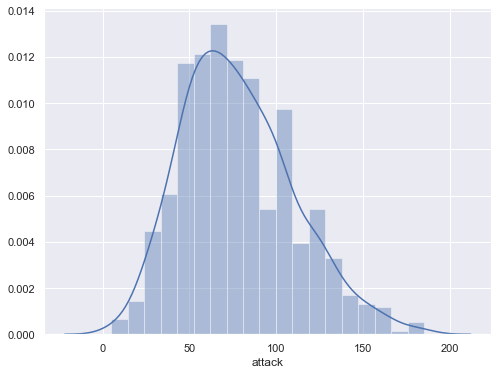

In [278]:
sns.distplot(X_full['attack'])

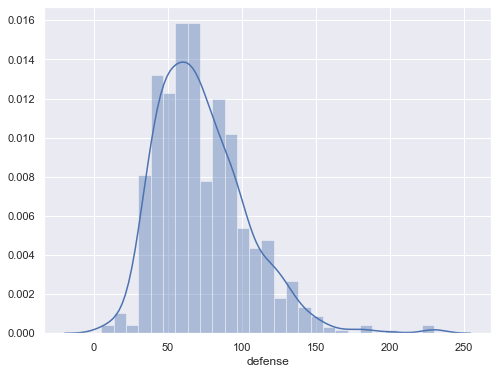

In [259]:
sns.distplot(X_full['defense'])

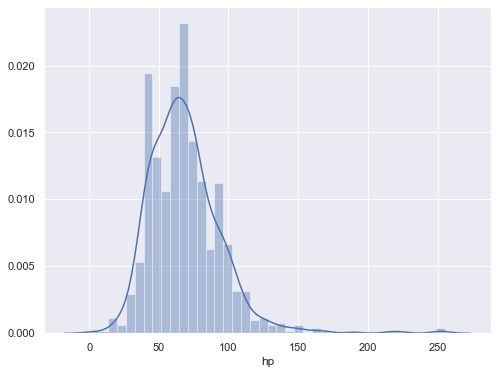

In [260]:
sns.distplot(X_full['hp'])

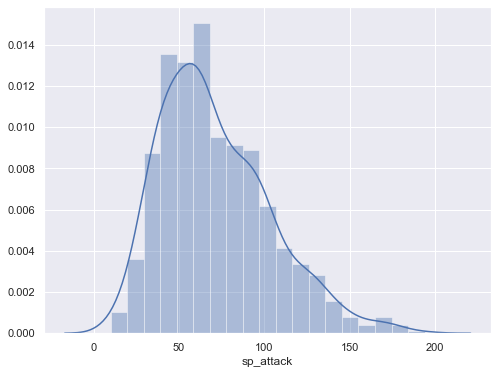

In [261]:
sns.distplot(X_full['sp_attack'])

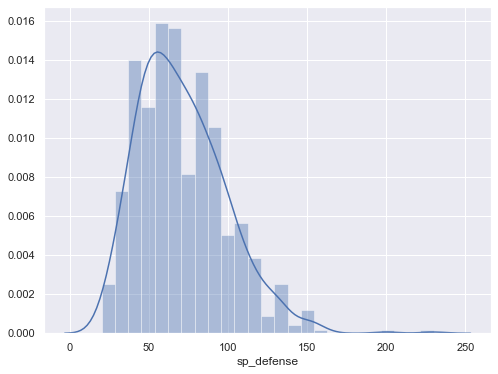

In [262]:
sns.distplot(X_full['sp_defense'])

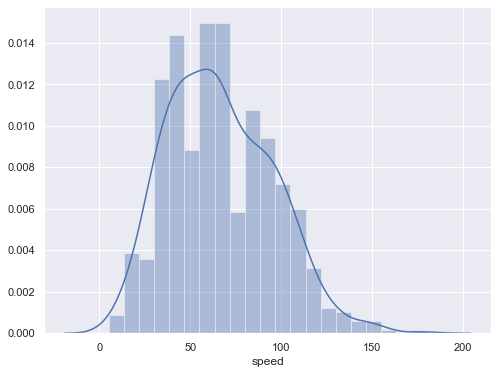

In [263]:
sns.distplot(X_full['speed'])

In [264]:
types = ('I', 'II', 'III', 'IV', 'V', 'VI', 'VII')

## Data visualization and correlation between attributes
We are going to plot the scatterplot between different attributes. We want to focus on basic stats and height/weight. Lets have a overview look on heatmap first. We can discover that capture rate has a strong negative impact on other attributes. Also, base total has a strong influence on different basic stats.

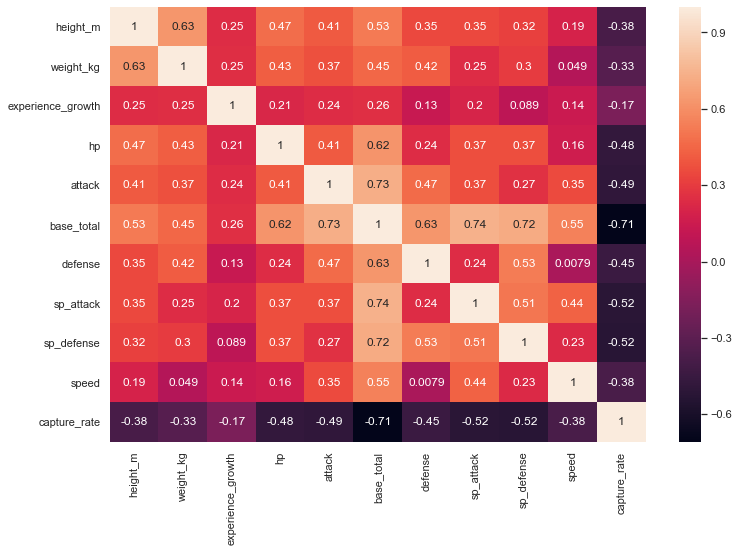

In [266]:
sns.set(rc={'figure.figsize':(12,8)})
pokemon_mfeatures = ['height_m', 'weight_kg', 
                     'experience_growth', 'hp', 'attack','base_total',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate']
poke_mval = X_full[pokemon_mfeatures]
X = pd.DataFrame(poke_mval)
sns.heatmap(X.corr(), annot = True)

Maybe legend characters have extreme values affecting the accuration and corrlation, so we try to filter out and have a look again. After filtering out legends, there are no much changes on correlation.

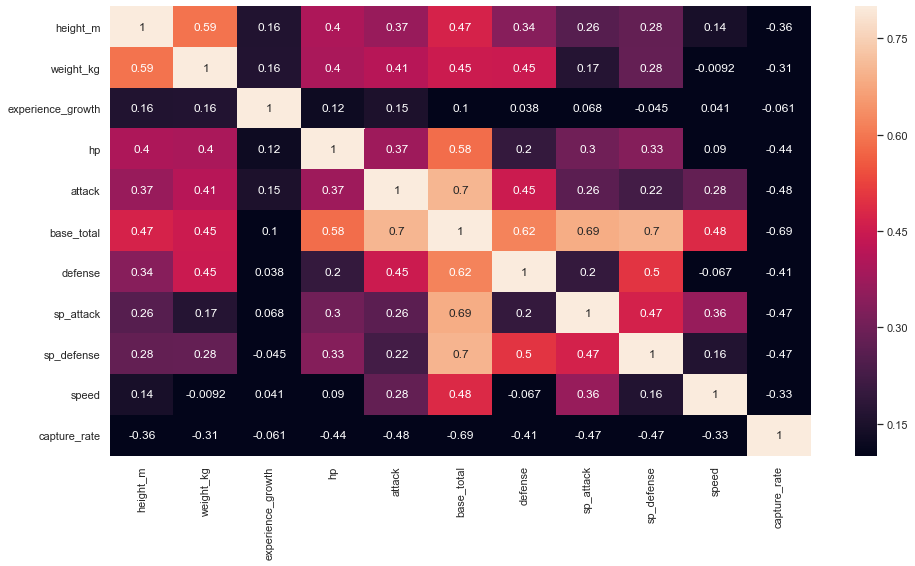

In [267]:
is_not_legend =  X_full['is_legendary']==0
X_not_legend = X[is_not_legend]
X_not_legend = X_not_legend[pokemon_mfeatures]
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(X_not_legend.corr(), annot = True, vmin=0.1, vmax=0.8)

We also filter out the pokemon with the capture rate > 150 or not.

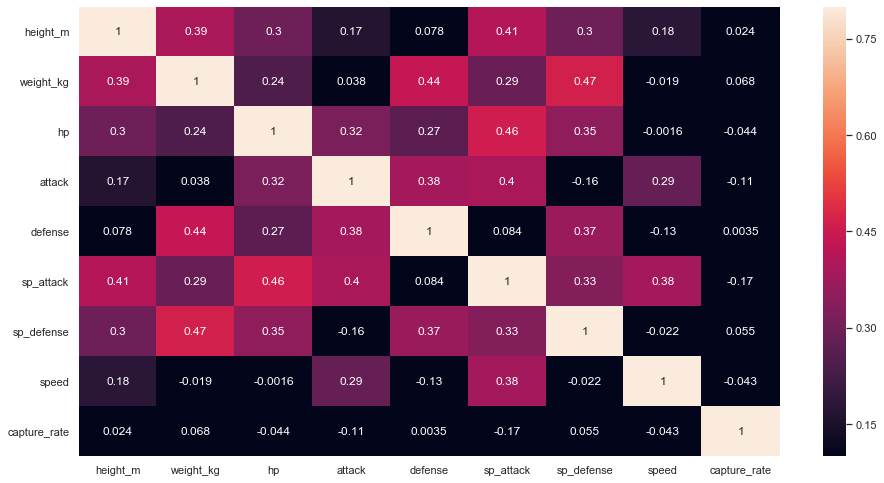

In [269]:
is_easy_capture =  X_full['capture_rate'] > 200
X_is_easy_capture = X[is_easy_capture]
pokemon_mfeatures = ['height_m', 'weight_kg', 
                     'hp', 'attack',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate']
X_is_easy_capture = X_is_easy_capture[pokemon_mfeatures]
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(X_is_easy_capture.corr(), annot = True, vmin=0.1, vmax=0.8)

Have a look on scatterplot between base total and capture_rate. From the below graph we can discover that there is a negative variation between all basic statistic and capture_rate. 

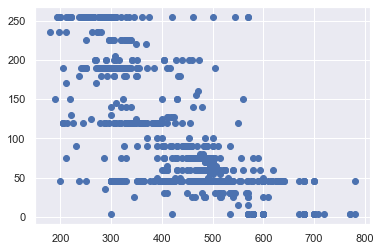

In [270]:
plt.figure(figsize=(6,4))
plt.scatter(X_full['base_total'], X_full['capture_rate'])

Let's calculate different corrlections for capture_rate and base_total. The pearsons correlation and spearman correlation value between base total and capture_rate are both smaller than -0.7.

In [57]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_full['base_total'], X_full['capture_rate'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_full['base_total'], X_full['capture_rate'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.709
Spearmans correlation: -0.708


### Normal
Consider the different types of pokemon also affects the correlation. We can filter data by their types. Let's focus on type normal only. From the above graph we found that attack and defense have a high correlation. Also, height have a high correlation of defense and sp_defense and hp have a high correlation with sp_defense. Sp_defense have a high correlation with defense. 
 - attack vs defense
 - height vs defense and sp_defense
 - sp_defense vs defense

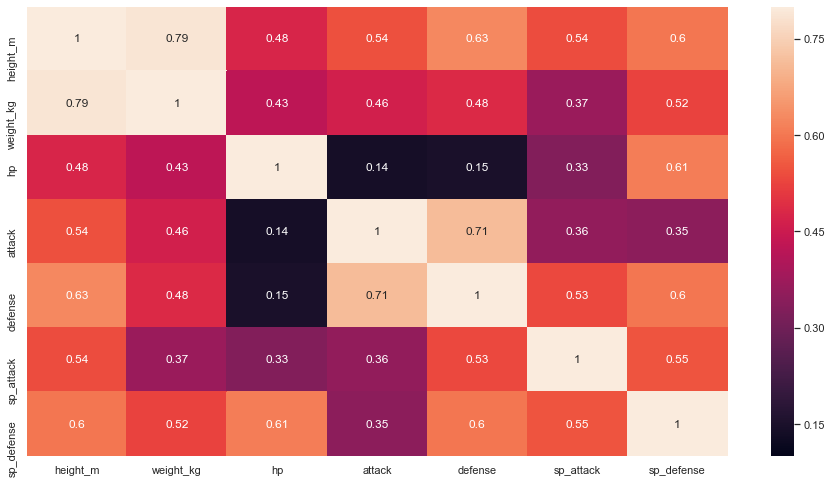

In [112]:
is_type1_normal = X_full['type1'] == "normal"
is_type2_normal = X_full['type2'] == "normal"
X_normal = X_full[is_type1_normal | is_type2_normal]
pokemon_mfeatures = ['height_m', 'weight_kg', 
                     'hp', 'attack',
                     'defense','sp_attack', 'sp_defense']
X_normal = X_normal[pokemon_mfeatures]
sns.heatmap(X_normal.corr(), annot = True, vmin=0.1, vmax=0.8)

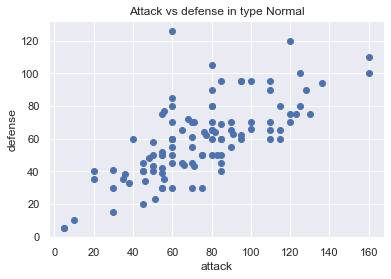

In [62]:
plt.figure(figsize=(6,4))
plt.title('Attack vs defense in type Normal')
plt.xlabel('attack')
plt.ylabel('defense')
plt.scatter(X_normal['attack'], X_normal['defense'])

In [34]:
from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(X_normal['attack'], X_normal['defense'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_normal['attack'], X_normal['defense'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.713
Spearmans correlation: 0.713


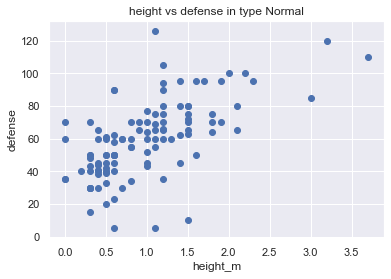

In [63]:
plt.figure(figsize=(6,4))
plt.title('height vs defense in type Normal')
plt.xlabel('height_m')
plt.ylabel('defense')
plt.scatter(X_normal['height_m'], X_normal['defense'])

In [36]:
corr, _ = pearsonr(X_normal['height_m'], X_normal['defense'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_normal['height_m'], X_normal['defense'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.626
Spearmans correlation: 0.658


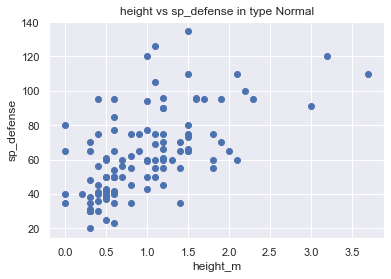

In [64]:
plt.figure(figsize=(6,4))
plt.title('height vs sp_defense in type Normal')
plt.xlabel('height_m')
plt.ylabel('sp_defense')
plt.scatter(X_normal['height_m'], X_normal['sp_defense'])

In [38]:
corr, _ = pearsonr(X_normal['height_m'], X_normal['sp_defense'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_normal['height_m'], X_normal['sp_defense'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.599
Spearmans correlation: 0.617


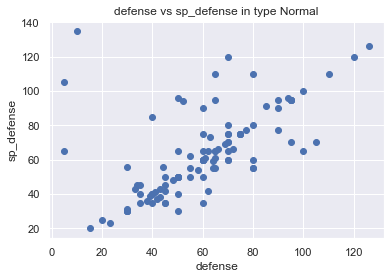

In [65]:
plt.figure(figsize=(6,4))
plt.title('defense vs sp_defense in type Normal')
plt.xlabel('defense')
plt.ylabel('sp_defense')
plt.scatter(X_normal['defense'], X_normal['sp_defense'])

In [45]:
corr, _ = pearsonr(X_normal['sp_defense'], X_normal['defense'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_normal['sp_defense'], X_normal['defense'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.600
Spearmans correlation: 0.707


### Bugs
We try another one focusing on bugs. This time, we found the following relationship:
 - height vs hp and attack
 - hp vs sp_attack
 - defense vs sp_defense

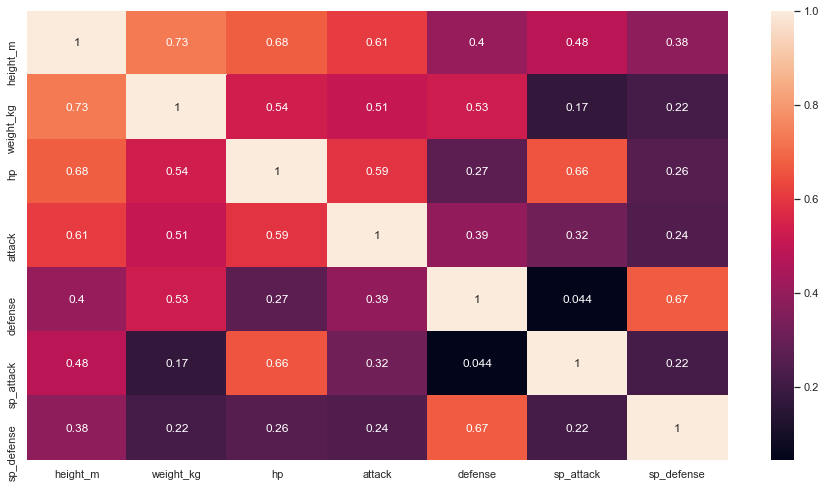

In [83]:
is_type1_bug = X_full['type1'] == "bug"
is_type2_bug = X_full['type2'] == "bug"
X_bug = X[is_type1_bug | is_type2_bug]
pokemon_mfeatures = ['height_m', 'weight_kg', 
                     'hp', 'attack',
                     'defense','sp_attack', 'sp_defense']
X_bug = X_bug[pokemon_mfeatures]
sns.heatmap(X_bug.corr(), annot = True)

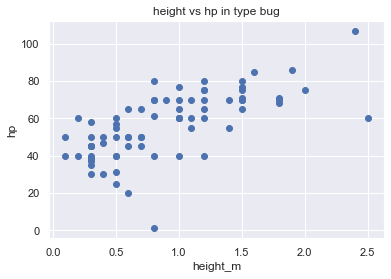

In [66]:
plt.figure(figsize=(6,4))
plt.title('height vs hp in type bug')
plt.xlabel('height_m')
plt.ylabel('hp')
plt.scatter(X_bug['height_m'], X_bug['hp'])

In [67]:
corr, _ = pearsonr(X_bug['height_m'], X_bug['hp'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_bug['height_m'], X_bug['hp'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.679
Spearmans correlation: 0.735


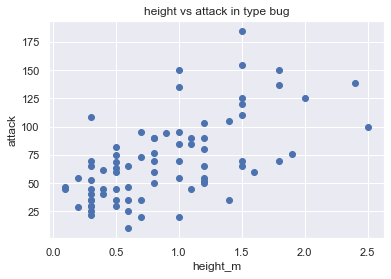

In [68]:
plt.figure(figsize=(6,4))
plt.title('height vs attack in type bug')
plt.xlabel('height_m')
plt.ylabel('attack')
plt.scatter(X_bug['height_m'], X_bug['attack'])

In [69]:
corr, _ = pearsonr(X_bug['height_m'], X_bug['attack'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_bug['height_m'], X_bug['attack'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.610
Spearmans correlation: 0.605


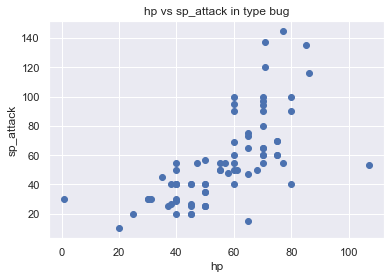

In [70]:
plt.figure(figsize=(6,4))
plt.title('hp vs sp_attack in type bug')
plt.xlabel('hp')
plt.ylabel('sp_attack')
plt.scatter(X_bug['hp'], X_bug['sp_attack'])

In [71]:
corr, _ = pearsonr(X_bug['sp_attack'], X_bug['hp'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_bug['sp_attack'], X_bug['hp'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.659
Spearmans correlation: 0.756


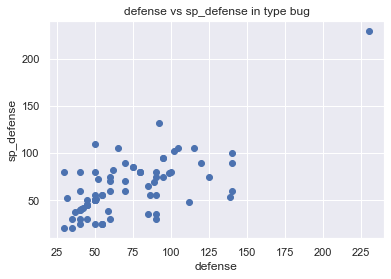

In [72]:
plt.figure(figsize=(6,4))
plt.title('defense vs sp_defense in type bug')
plt.xlabel('defense')
plt.ylabel('sp_defense')
plt.scatter(X_bug['defense'], X_bug['sp_defense'])

In [73]:
corr, _ = pearsonr(X_bug['defense'], X_bug['sp_defense'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_bug['defense'], X_bug['sp_defense'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.673
Spearmans correlation: 0.585


### Dragon
We try to focus on dragon. Here are some interesting findings:
 - height vs hp, sp_attack
 - weight vs hp
 - attack vs defense

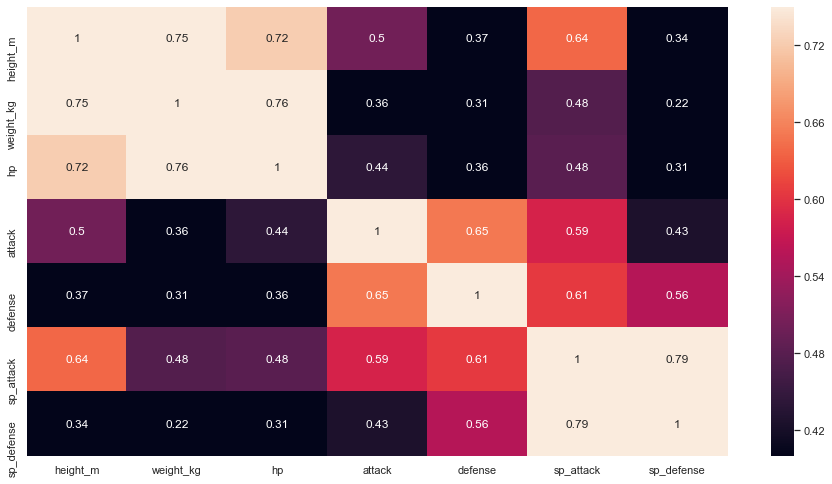

In [98]:
is_type1_dragon = X_full['type1'] == "dragon"
is_type2_dragon = X_full['type2'] == "dragon"
X_dragon = X[is_type1_dragon | is_type2_dragon]
pokemon_mfeatures = ['height_m', 'weight_kg', 
                     'hp', 'attack',
                     'defense','sp_attack', 'sp_defense']
X_dragon = X_dragon[pokemon_mfeatures]
sns.heatmap(X_dragon.corr(), annot = True, vmax=0.75, vmin=0.4)

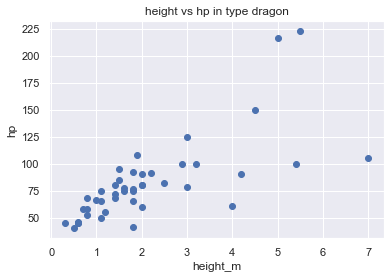

In [100]:
plt.figure(figsize=(6,4))
plt.title('height vs hp in type dragon')
plt.xlabel('height_m')
plt.ylabel('hp')
plt.scatter(X_dragon['height_m'], X_dragon['hp'])

In [101]:
corr, _ = pearsonr(X_dragon['height_m'], X_dragon['hp'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_dragon['height_m'], X_dragon['hp'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.721
Spearmans correlation: 0.793


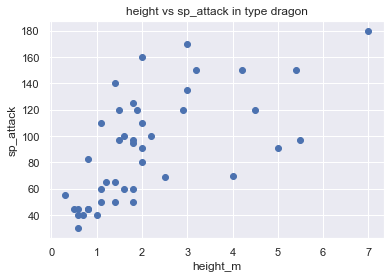

In [102]:
plt.figure(figsize=(6,4))
plt.title('height vs sp_attack in type dragon')
plt.xlabel('height_m')
plt.ylabel('sp_attack')
plt.scatter(X_dragon['height_m'], X_dragon['sp_attack'])

In [103]:
corr, _ = pearsonr(X_dragon['height_m'], X_dragon['sp_attack'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_dragon['height_m'], X_dragon['sp_attack'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.639
Spearmans correlation: 0.733


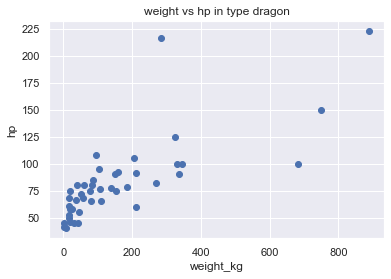

In [106]:
plt.figure(figsize=(6,4))
plt.title('weight vs hp in type dragon')
plt.xlabel('weight_kg')
plt.ylabel('hp')
plt.scatter(X_dragon['weight_kg'], X_dragon['hp'])

In [107]:
corr, _ = pearsonr(X_dragon['weight_kg'], X_dragon['hp'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_dragon['weight_kg'], X_dragon['hp'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.764
Spearmans correlation: 0.832


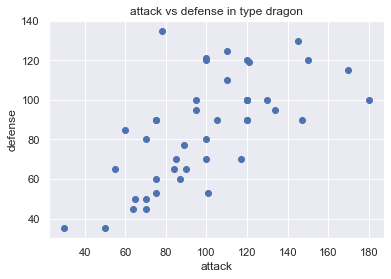

In [108]:
plt.figure(figsize=(6,4))
plt.title('attack vs defense in type dragon')
plt.xlabel('attack')
plt.ylabel('defense')
plt.scatter(X_dragon['attack'], X_dragon['defense'])

In [109]:
corr, _ = pearsonr(X_dragon['attack'], X_dragon['defense'].astype(float))
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(X_dragon['attack'], X_dragon['defense'].astype(float))
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.651
Spearmans correlation: 0.691


## Frequent itemset
First, we are going to find out the number of having multi-types.

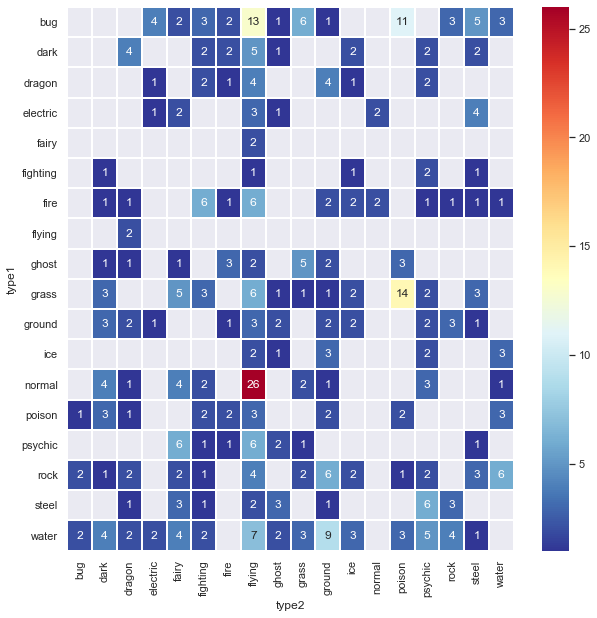

In [279]:
plt.subplots(figsize=(10, 10))
sns.heatmap(
    X_full[X_full['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths = 1,
    annot = True,
    cmap = "RdYlBu_r" # color
)

plt.show()

To implement Apriori Algorithm, our dataset should be a form of array of arrays. We try to ignore the single types to find relationship between types. herefore, we convert our dataset by the following script:

In [285]:
records = []
X_full['type1'][0]
for i in range(0, 800):
    record = []
    record.append(X_full['type1'][i])
    if X_full['type2'][i] != "None":
        record.append(X_full['type2'][i])
        records.append(record)
association_rules = apriori(records, min_support=0.01, min_confidence=0.2, min_lift=1.5, min_length=2)
association_results = list(association_rules)
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['bug'] -> ['poison']
Support: 0.028846153846153848
Confidence: 0.2033898305084746
Lift: 1.6590229312063811
Rule: ['fairy'] -> ['psychic']
Support: 0.014423076923076924
Confidence: 0.20000000000000004
Lift: 1.7702127659574471
Rule: ['flying'] -> ['normal']
Support: 0.0625
Confidence: 0.26804123711340205
Lift: 2.3230240549828176
Rule: ['grass'] -> ['poison']
Support: 0.03365384615384615
Confidence: 0.23333333333333334
Lift: 1.9032679738562093


Implementing apriori algorithm. We are using apyori library. As the majority of pokemon has only one type, it is hard to have rules with large min_support as well as confidence. Therefore, we focus on abilities and use only the normal, dragon and bug type data.

### normal

In [159]:
records = []
is_type1_normal = X_full['type1'] == "normal"
is_type2_normal = X_full['type2'] == "normal"
X_normal = X_full[is_type1_normal | is_type2_normal]
for ablities in X_normal['abilities']:
    record = []
    abilitiesStrParts = ablities.split(",")
    for j in range(len(abilitiesStrParts)):
        abilitiesStrParts[j] = abilitiesStrParts[j].strip()
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("[")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("]")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("'")
        record.append(abilitiesStrParts[j])
    records.append(record)
association_rules = apriori(records, min_support=0.02, min_confidence=0.8, min_lift=1, min_length=2)
association_results = list(association_rules)
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['Download'] -> ['Analytic']
Support: 0.027522935779816515
Confidence: 1.0
Lift: 21.799999999999997
Rule: ['Super Luck'] -> ['Big Pecks']
Support: 0.027522935779816515
Confidence: 1.0
Lift: 13.625
Rule: ['Competitive'] -> ['Cute Charm']
Support: 0.027522935779816515
Confidence: 1.0
Lift: 12.11111111111111
Rule: ['Super Luck'] -> ['Rivalry']
Support: 0.027522935779816515
Confidence: 1.0
Lift: 21.799999999999997
Rule: ['Big Pecks', 'Keen Eye'] -> ['Tangled Feet']
Support: 0.03669724770642202
Confidence: 1.0
Lift: 15.571428571428571
Rule: ['Super Luck'] -> ['Big Pecks', 'Rivalry']
Support: 0.027522935779816515
Confidence: 1.0
Lift: 36.33333333333333


### bug

In [161]:
records = []
is_type1_bug = X_full['type1'] == "bug"
is_type2_bug = X_full['type2'] == "bug"
X_bug = X_full[is_type1_bug | is_type2_bug]
for ablities in X_bug['abilities']:
    record = []
    abilitiesStrParts = ablities.split(",")
    for j in range(len(abilitiesStrParts)):
        abilitiesStrParts[j] = abilitiesStrParts[j].strip()
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("[")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("]")
        abilitiesStrParts[j] = abilitiesStrParts[j].strip("'")
        record.append(abilitiesStrParts[j])
    records.append(record)
association_rules = apriori(records, min_support=0.03, min_confidence=0.8, min_lift=1, min_length=2)
association_results = list(association_rules)
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['Chlorophyll'] -> ['Overcoat']
Support: 0.03896103896103896
Confidence: 1.0
Lift: 8.555555555555555
Rule: ['Poison Point'] -> ['Speed Boost']
Support: 0.03896103896103896
Confidence: 1.0
Lift: 12.833333333333334
Rule: ['Poison Point'] -> ['Swarm']
Support: 0.03896103896103896
Confidence: 1.0
Lift: 3.08
Rule: ['Technician'] -> ['Swarm']
Support: 0.03896103896103896
Confidence: 1.0
Lift: 3.08
Rule: ['Poison Point'] -> ['Speed Boost', 'Swarm']
Support: 0.03896103896103896
Confidence: 1.0
Lift: 25.666666666666668


We can also combine abilities and types to see if there are any hidden rules between abilities and types. Also we are filtering out for only normal, bug and dragon

In [162]:
records = []
for i in range(0, 800):
    if X_full['type1'][i] == "normal" or X_full['type2'][i] == "normal" or X_full['type1'][i] == "bug" or X_full['type2'][i] == "bug": 
        record = []
        abilitiesStrParts = X_full["abilities"][i].split(",")
        for j in range(len(abilitiesStrParts)):
            abilitiesStrParts[j] = abilitiesStrParts[j].strip()
            abilitiesStrParts[j] = abilitiesStrParts[j].strip("[")
            abilitiesStrParts[j] = abilitiesStrParts[j].strip("]")
            abilitiesStrParts[j] = abilitiesStrParts[j].strip("'")
            record.append(abilitiesStrParts[j])
            record.append(X_full['type1'][i])
            if X_full['type2'][i] != "None":
                record.append(X_full['type2'][i])
        records.append(record)
association_rules = apriori(records, min_support=0.05, min_confidence=0.8, min_lift=1, min_length=1)
association_results = list(association_rules)
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['Keen Eye'] -> ['normal']
Support: 0.10752688172043011
Confidence: 0.9523809523809524
Lift: 1.6251638269986894
Rule: ['Pickup'] -> ['normal']
Support: 0.06451612903225806
Confidence: 1.0
Lift: 1.7064220183486238
Rule: ['Swarm'] -> ['bug']
Support: 0.13440860215053763
Confidence: 1.0
Lift: 2.4155844155844153
Rule: ['poison'] -> ['bug']
Support: 0.06451612903225806
Confidence: 1.0
Lift: 2.4155844155844153
Rule: ['flying', 'Keen Eye'] -> ['normal']
Support: 0.08064516129032258
Confidence: 1.0
Lift: 1.7064220183486238


## K-Means Clustering for types
Can we cluster the data to classify the types of a pokemon? It is a little bit hard to have 18 clusters at the same time. Therefore, I will comparing them one to one, like dragon vs normal for example. First, we filter out pokemons which is neither belongs to dragon nor normal. 

In [190]:
pokemon_mfeatures = ['height_m', 'weight_kg', 
                     'experience_growth', 'hp', 'attack','base_total',
                     'defense','sp_attack', 'sp_defense', 'speed', 'capture_rate']
dragon_or_normal = X_full[X_full['type1'].isin(['dragon', 'normal'])][pokemon_mfeatures]
type_actual = X_full[X_full['type1'].isin(['dragon', 'normal'])]['type1']
df_norm = dragon_or_normal.copy()

Then, we implement kMeans clustering to see if we can have a good cluster. The first cluster represents the actual cluster and the second one represents the kmeans cluster. We can discover that kMeans did a good job at this moment, as it have a similar cluster compare to the actual cluster for dragon vs normal.

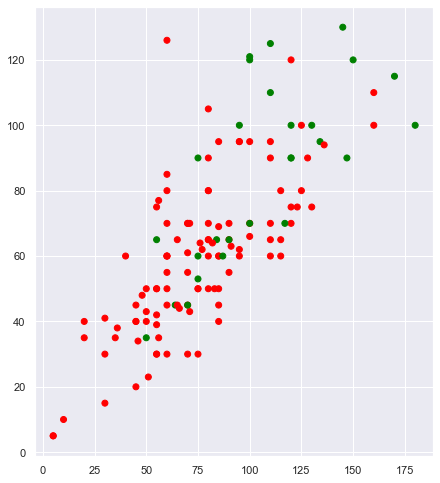

In [198]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_norm.fillna(0, inplace=True)
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_norm[["attack","defense"]])
type_kmeans = kmeans.predict(df_norm[["attack","defense"]])
def mapTypeToColor(n): 
    if n == "normal":
        return "red"
    return "green"
type_actual_map = map(mapTypeToColor,type_actual)

plt.figure()
plt.subplot(122)
plt.scatter(df_norm['attack'],df_norm['defense'],c=list(type_actual_map))

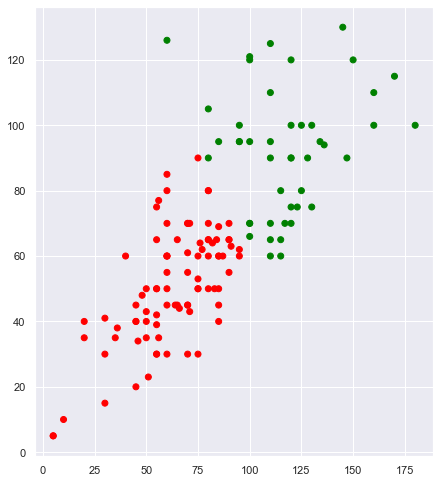

In [199]:
plt.figure()
plt.subplot(121)
def mapBoolToColor(n): 
    if n == 0:
        return "red"
    return "green"
type_actual_map = map(mapBoolToColor,type_actual)
type_predict_map = map(mapBoolToColor,type_kmeans)
plt.scatter(df_norm['attack'],df_norm['defense'],c=list(type_predict_map))

In [227]:
dragon_or_normal = X_full[X_full['type1'].isin(['normal', 'bug'])]
type_actual = X_full[X_full['type1'].isin(['normal', 'bug'])]['type1']
df_norm = dragon_or_normal.copy()

Then, we implement kMeans clustering to see if we can have a good cluster. The first cluster represents the actual cluster and the second one represents the kmeans cluster. We can discover that kMeans did a good job at this moment, as it have a similar cluster compare to the actual cluster for dragon vs normal.

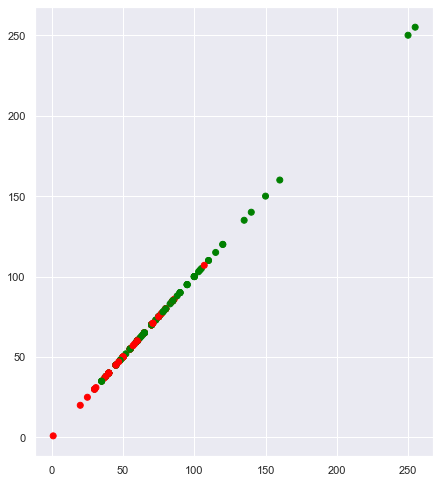

In [232]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_norm.fillna(0, inplace=True)
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_norm[["hp"]])
type_kmeans = kmeans.predict(df_norm[["hp"]])
def mapTypeToColor(n): 
    if n == "bug":
        return "red"
    return "green"
type_actual_map = map(mapTypeToColor,type_actual)

plt.figure()
plt.subplot(122)
plt.scatter(df_norm['hp'],df_norm['hp'],c=list(type_actual_map))

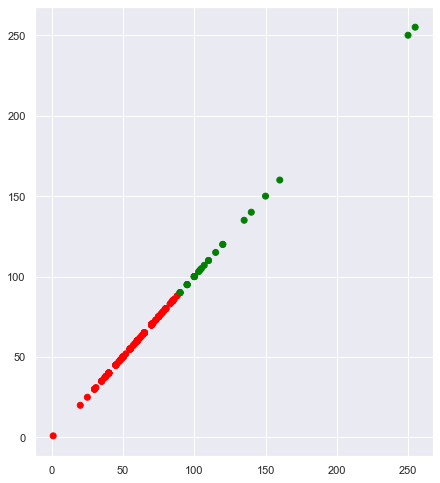

In [234]:
plt.figure()
plt.subplot(121)
def mapBoolToColor(n): 
    if n == 1:
        return "red"
    return "green"
type_actual_map = map(mapBoolToColor,type_actual)
type_predict_map = map(mapBoolToColor,type_kmeans)
plt.scatter(df_norm['hp'],df_norm['hp'],c=list(type_predict_map))

In [236]:
dragon_or_bug = X_full[X_full['type1'].isin(['dragon', 'bug'])]
type_actual = X_full[X_full['type1'].isin(['dragon', 'bug'])]['type1']
df_norm = dragon_or_bug.copy()

The first cluster represents the actual cluster and the second one represents the kmeans cluster. We can discover that kMeans did a good job at this moment, as it have a similar cluster compare to the actual cluster for dragon vs bug.

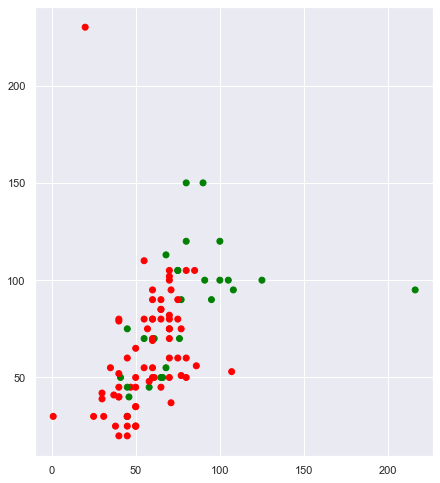

In [243]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_norm.fillna(0, inplace=True)
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_norm[["hp", "sp_defense"]])
type_kmeans = kmeans.predict(df_norm[["hp", "sp_defense"]])
def mapTypeToColor(n): 
    if n == "bug":
        return "red"
    return "green"
type_actual_map = map(mapTypeToColor,type_actual)

plt.figure()
plt.subplot(122)
plt.scatter(df_norm['hp'],df_norm['sp_defense'],c=list(type_actual_map))

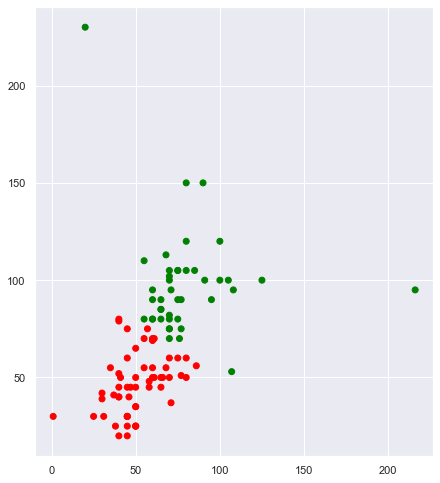

In [244]:
plt.figure()
plt.subplot(121)
def mapBoolToColor(n): 
    if n == 1:
        return "red"
    return "green"
type_actual_map = map(mapBoolToColor,type_actual)
type_predict_map = map(mapBoolToColor,type_kmeans)
plt.scatter(df_norm['hp'],df_norm['sp_defense'],c=list(type_predict_map))